In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

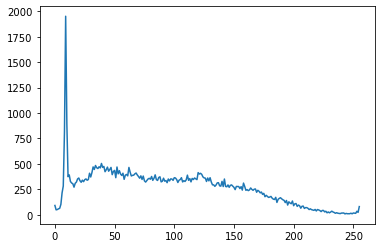

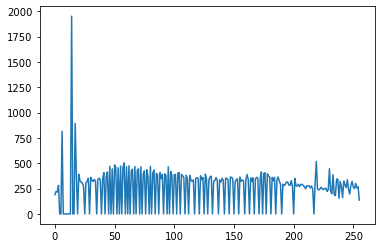

In [58]:
image = cv2.imread("cat.jpg",0)
save_image = image.copy()
cv2.imshow("Cat",image)

alfa = 1.0
beta = 1.0
gamma = 1.0

hist = np.zeros(256) 

def changeImage():
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            res = float(alfa)/100 * save_image[x][y] + beta
            res = (res/255)**(gamma/100) * 255
            res = res if res >= 0 and res <= 255 else 255 if res > 255 else 0     
            image[x][y] = res

            
            
def computeHist(image):
    global hist
    hist = np.zeros(256) 
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            hist[image[x][y]] += 1

def diffImage():
    changeImage()
    cv2.imshow("Cat",image)
    computeHist(image)
    plt.plot(hist)
    plt.show()
            
def alfaChange(x):
    global alfa
    alfa = x
    diffImage()
    
def betaChange(x):
    global beta
    beta = x
    diffImage()
    
def gammaChange(x):
    global gamma
    gamma = x
    diffImage()

    
#cv2.createTrackbar("alfa", "Cat",0,255, alfaChange)
#cv2.createTrackbar("beta", "Cat",0,255, betaChange)
#cv2.createTrackbar("gamma", "Cat",0,200, gammaChange)

eqImage = cv2.equalizeHist(image)

cv2.imshow("EqCat",eqImage)
computeHist(image)
plt.plot(hist)
plt.show()
computeHist(eqImage)
plt.plot(hist)
plt.show()


cv2.waitKey(0)
cv2.destroyAllWindows()